##### VL = Very low            (1 hotspot)
##### L = Low                      (2 hotspot)
##### M = Medium               (3 hotspot)
##### H = Hard                     (4 hotspot)
##### VH = Very Hard         (>=5 hotspot)
##### EH = Extreme Hard  (string hotspot)
##### 

# imports libs

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
from os import path

##### funções de pertinência para a redução da corrente em porcentos


In [2]:
ppl = ctrl.Antecedent(np.arange(0, 27, 0.01), 'PPL')
ppl

Antecedent: PPL

In [3]:
# Cria as funções de pertinência
ppl['VL'] = fuzz.trimf(ppl.universe, [0, 0.5, 1.4])
ppl['L'] = fuzz.trimf(ppl.universe, [1.1, 2.0, 2.9])
ppl['M'] = fuzz.trimf(ppl.universe, [1.5, 2.65, 3.8])
ppl['H'] = fuzz.trimf(ppl.universe, [2.5, 4.05, 5.6])
ppl['VH'] = fuzz.trimf(ppl.universe, [5.4 , 10.85, 16.3])
ppl['EH'] = fuzz.trimf(ppl.universe, [11.7, 19.0, 26.3])

/home/erik/Documentos/fuzzy/.env/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


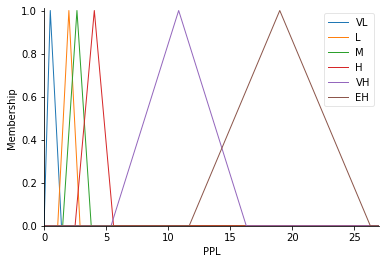

In [4]:
ppl.view()

##### funções de pertinência para a redução da corrente em porcentos

In [5]:
Isc = ctrl.Antecedent(np.arange(0, 6, 0.01), 'Isc')
Isc

Antecedent: Isc

In [6]:
Isc['VL'] = fuzz.trimf(Isc.universe, [0.7, 1.1, 1.5])
Isc['L'] = fuzz.trimf(Isc.universe, [0.95, 1.625, 2.3])
Isc['M'] = fuzz.trimf(Isc.universe, [1.3, 2.0, 2.7])
Isc['H'] = fuzz.trimf(Isc.universe, [1.33, 2.115, 2.9])
Isc['VH'] = fuzz.trimf(Isc.universe, [2.1 , 2.95, 3.8])
Isc['EH'] = fuzz.trimf(Isc.universe, [1.8, 3.1, 4.4])

/home/erik/Documentos/fuzzy/.env/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


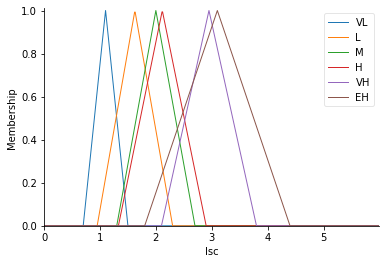

In [7]:
Isc.view()

##### funções de pertinência para a redução da tensão em porcentos

In [8]:
Voc = ctrl.Antecedent(np.arange(0, 6, 0.01), 'Voc')
Voc

Antecedent: Voc

In [9]:
Voc['VL'] = fuzz.trimf(Voc.universe, [0.3, 0.55, 0.8])
Voc['L'] = fuzz.trimf(Voc.universe, [0.65, 1.225, 1.8])
Voc['M'] = fuzz.trimf(Voc.universe, [1.4, 1.8, 2.2])
Voc['H'] = fuzz.trimf(Voc.universe, [1.7, 2.2, 2.7])
Voc['VH'] = fuzz.trimf(Voc.universe, [1.88 , 2.49, 3.1])
Voc['EH'] = fuzz.trimf(Voc.universe, [2.7, 3.8, 4.9])

/home/erik/Documentos/fuzzy/.env/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


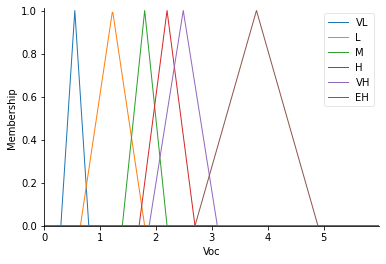

In [10]:
Voc.view()

##### pertinence function for output membership function (OMF) 

In [11]:
omf = ctrl.Consequent(np.arange(0, 1, 0.01), 'omf')
omf

Consequent: omf

In [24]:
omf['VL'] = fuzz.trimf(omf.universe, [0.0, 0.09, 0.18])
omf['L'] = fuzz.trimf(omf.universe, [0.16, 0.25, 0.34])
omf['M'] = fuzz.trimf(omf.universe, [0.32, 0.41, 0.498])
omf['H'] = fuzz.trimf(omf.universe, [0.48, 0.57, 0.655])
omf['VH'] = fuzz.trimf(omf.universe, [0.64, 0.73, 0.820])
omf['EH'] = fuzz.trimf(omf.universe, [0.8, 0.88, 0.88])

/home/erik/Documentos/fuzzy/.env/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


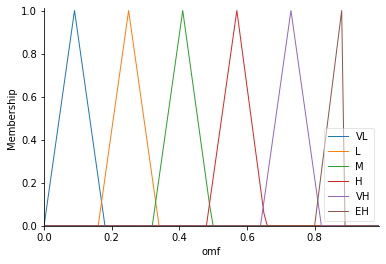

In [25]:
omf.view()

# rules of output

In [26]:
rule1 = ctrl.Rule(ppl['VL'] & Isc['L'] & Voc['L'], omf['VL'])
rule2 = ctrl.Rule(ppl['L'] & Isc['M'] & Voc['L'], omf['L'])
rule3 = ctrl.Rule(ppl['M'] & Isc['M'] & Voc['M'], omf['M'])
rule4 = ctrl.Rule(ppl['M'] & Isc['H'] & Voc['H'], omf['H'])
rule5 = ctrl.Rule(ppl['H'] & Isc['VH'] & Voc['H'], omf['VH'])
rule6 = ctrl.Rule(ppl['VH'] & Isc['VH'] & Voc['VL'], omf['EH'])

In [29]:
gorjeta_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
gorjeta_simulador = ctrl.ControlSystemSimulation(gorjeta_ctrl)

# Entrando com alguns valores para qualidade da comida e do serviço
gorjeta_simulador.input['PPL'] = 7.23
gorjeta_simulador.input['Isc'] = 3.74
gorjeta_simulador.input['Voc'] = 2.93


# Computando o resultado
gorjeta_simulador.compute()
print(gorjeta_simulador.output['omf'])


ValueError: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.

/home/erik/Documentos/fuzzy/.env/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/erik/Documentos/fuzzy/.env/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/erik/Documentos/fuzzy/.env/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/erik/Documentos/fuzzy/.env/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.sho

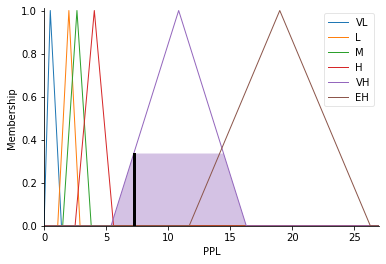

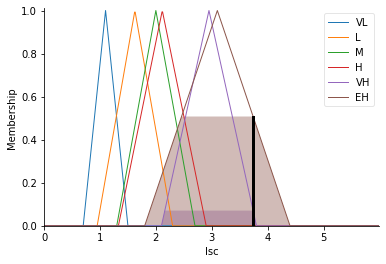

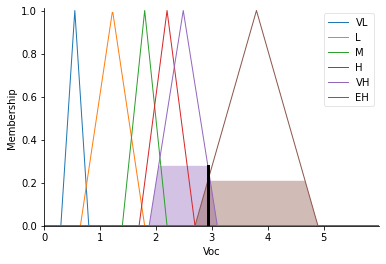

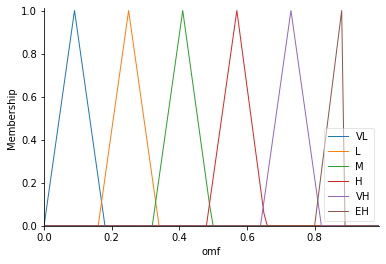

In [30]:
ppl.view(sim=gorjeta_simulador)
Isc.view(sim=gorjeta_simulador)
Voc.view(sim=gorjeta_simulador)
omf.view(sim=gorjeta_simulador)